In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split#for training and spliting the model and also testing
from sklearn.ensemble import RandomForestRegressor#for the model 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error#metrics to analyze the data
from sklearn.linear_model import LinearRegression#for the model

In [49]:
df=pd.read_csv("\\Users\\adilm\\Downloads\\archive (41)\\logistics_shipments_dataset.csv")

In [50]:
df.head(5)

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3


In [51]:
df.shape

(2000, 11)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shipment_ID       2000 non-null   object 
 1   Origin_Warehouse  2000 non-null   object 
 2   Destination       2000 non-null   object 
 3   Carrier           2000 non-null   object 
 4   Shipment_Date     2000 non-null   object 
 5   Delivery_Date     1968 non-null   object 
 6   Weight_kg         2000 non-null   float64
 7   Cost              1959 non-null   float64
 8   Status            2000 non-null   object 
 9   Distance_miles    2000 non-null   int64  
 10  Transit_Days      2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


In [53]:
df['Shipment_Date']=pd.to_datetime(df['Shipment_Date'],format='mixed',errors='coerce')

In [54]:
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], format='mixed', errors='coerce') 

In [55]:
df['Shipment_ID']=df['Shipment_ID'].str.replace("SH","",regex=False)

In [56]:
df['Shipment_ID']=df['Shipment_ID'].astype(int)

In [57]:
df.isna().sum()

Shipment_ID          0
Origin_Warehouse     0
Destination          0
Carrier              0
Shipment_Date        0
Delivery_Date       32
Weight_kg            0
Cost                41
Status               0
Distance_miles       0
Transit_Days         0
dtype: int64

In [58]:
df['Transit_days']=pd.to_timedelta(df['Transit_Days'],unit='D')

In [59]:
df['Delivery_Date'] = df['Delivery_Date'].fillna(
    df['Shipment_Date']+df['Transit_days'])

In [60]:
df['Cost']=df['Cost'].fillna(df['Cost'].median())

In [61]:
df.describe()

,Shipment_ID,Shipment_Date,Delivery_Date,Weight_kg,Cost,Distance_miles,Transit_Days,Transit_days
count,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000
mean,10999.500000,2023-07-05 12:00:00,2023-07-10 02:32:38.400000256,30.184800,204.982395,1275.868000,4.182500,4 days 04:22:48
min,10000.000000,2023-01-01 00:00:00,2023-01-03 00:00:00,0.000000,17.890000,101.000000,1.000000,1 days 00:00:00
25%,10499.750000,2023-04-05 18:00:00,2023-04-11 00:00:00,12.300000,119.220000,690.250000,3.000000,3 days 00:00:00
50%,10999.500000,2023-07-07 00:00:00,2023-07-11 12:00:00,20.700000,196.420000,1262.500000,4.000000,4 days 00:00:00
75%,11499.250000,2023-10-04 00:00:00,2023-10-08 00:00:00,33.925000,271.450000,1867.250000,5.000000,5 days 00:00:00
max,11999.000000,2023-12-31 00:00:00,2024-01-12 00:00:00,5404.200000,6562.210000,2499.000000,12.000000,12 days 00:00:00
std,577.494589,NaN,NaN,124.967053,220.295092,691.382829,1.837902,1 days 20:06:34.707643509


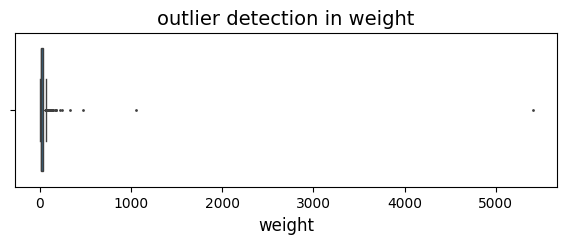

In [62]:
plt.figure(figsize=(7,2))
sns.boxplot(data=None,x=df['Weight_kg'],fliersize=1)
plt.xlabel("weight",fontsize=12)
plt.title("outlier detection in weight",fontsize=14)
plt.show()

In [63]:
Q1=df['Weight_kg'].quantile(0.25)
Q3=df['Weight_kg'].quantile(0.75)
IQR=Q3-Q1
lower_bond=Q1-1.5*IQR
upper_bond=Q3+1.5*IQR
df=df[(df['Weight_kg']>=lower_bond)&(df['Weight_kg']<=upper_bond)]

In [64]:
df[df['Weight_kg'] == 0]

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days,Transit_days
829,10829,Warehouse_CHI,Detroit,OnTrac,2023-02-03,2023-02-04,0.0,35.85,Delivered,283,1,1 days


In [65]:
df = df.drop(df[df['Weight_kg'] == 0].index)

In [66]:
df.describe()

,Shipment_ID,Shipment_Date,Delivery_Date,Weight_kg,Cost,Distance_miles,Transit_Days,Transit_days
count,1888.000000,1888,1888,1888.000000,1888.000000,1888.000000,1888.000000,1888
mean,10996.656780,2023-07-05 20:16:31.525423616,2023-07-10 10:10:55.932203520,22.890042,201.246912,1274.597987,4.174258,4 days 04:10:55.932203389
min,10000.000000,2023-01-01 00:00:00,2023-01-03 00:00:00,0.200000,17.890000,101.000000,1.000000,1 days 00:00:00
25%,10493.750000,2023-04-06 00:00:00,2023-04-11 00:00:00,11.900000,115.667500,677.000000,3.000000,3 days 00:00:00
50%,10996.500000,2023-07-07 00:00:00,2023-07-11 00:00:00,19.700000,195.375000,1262.500000,4.000000,4 days 00:00:00
75%,11499.250000,2023-10-04 00:00:00,2023-10-09 00:00:00,30.600000,266.697500,1866.000000,5.000000,5 days 00:00:00
max,11999.000000,2023-12-31 00:00:00,2024-01-12 00:00:00,66.300000,6562.210000,2499.000000,12.000000,12 days 00:00:00
std,578.400846,NaN,NaN,13.822215,224.938005,691.101034,1.833514,1 days 20:00:15.637081187


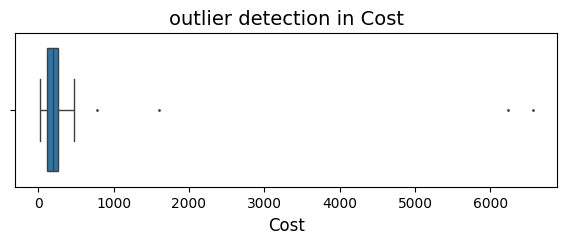

In [67]:
plt.figure(figsize=(7,2))
sns.boxplot(data=None,x=df['Cost'],fliersize=1)
plt.xlabel("Cost",fontsize=12)
plt.title("outlier detection in Cost",fontsize=14)
plt.show()

In [68]:
Q1=df['Cost'].quantile(0.25)
Q3=df['Cost'].quantile(0.75)
IQR=Q3-Q1
lower_bond=Q1-1.5*IQR
upper_bond=Q3+1.5*IQR
df=df[(df['Cost']>=lower_bond)&(df['Cost']<=upper_bond)]

In [69]:
df.duplicated().sum()#no dupliactes in data set 

0

In [70]:
df.tail(2)# feature engineering 

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days,Transit_days
1998,11998,Warehouse_SEA,Detroit,USPS,2023-10-17,2023-10-22,10.9,272.31,Delivered,2188,5,5 days
1999,11999,Warehouse_MIA,Portland,OnTrac,2023-07-08,2023-07-15,49.5,360.74,Delivered,2321,7,7 days


In [71]:
df1=df.copy()

In [72]:
df1.head(0)

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days,Transit_days


In [73]:
df1['Status']=df1['Status'].map({'Delivered':1,'Delayed':0})

In [74]:
#statistics

In [75]:
notdelivered=df1[df1['Status']==0]['Weight_kg']
delivered=df1[df1['Status']==1]['Weight_kg']
result=ttest_ind(a=notdelivered,b=delivered,equal_var=False)
print(result)
#not statistically significant

TtestResult(statistic=0.48584631678198864, pvalue=0.6275332516041623, df=232.7241747844807)


In [76]:
notdelivered=df1[df1['Status']==0]['Cost']
delivered=df1[df1['Status']==1]['Cost']
result=ttest_ind(a=notdelivered,b=delivered,equal_var=False)
print(result)
#not statistically significant

TtestResult(statistic=-0.19522277214682798, pvalue=0.8453924857664501, df=227.9029160284724)


In [77]:
notdelivered=df1[df1['Status']==0]['Distance_miles']
delivered=df1[df1['Status']==1]['Distance_miles']
result=ttest_ind(a=notdelivered,b=delivered,equal_var=False)
print(result)
#not statistically significant

TtestResult(statistic=-0.7674944638169856, pvalue=0.4435668920546587, df=232.32260735737827)


In [78]:
#grphs

C:\Users\adilm\AppData\Local\Temp\ipykernel_20424\5048812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=h_df,x='Shipment_ID',y='Cost',palette='viridis')


Text(0, 0.5, 'cost in dollars')

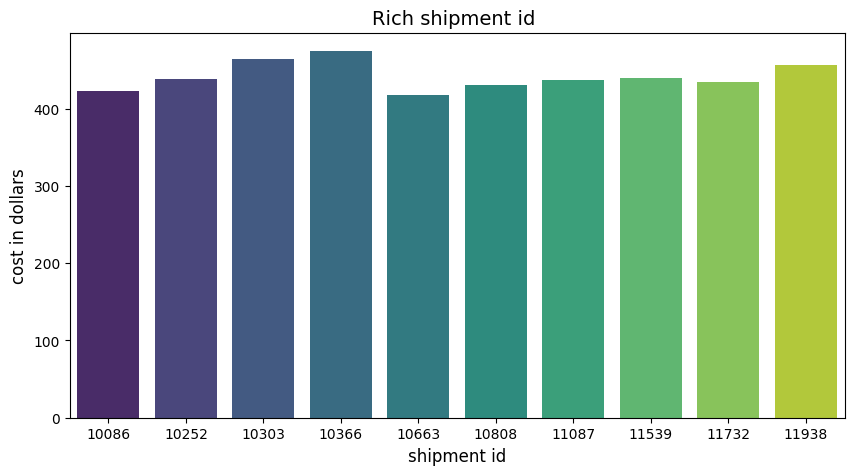

In [79]:
plt.figure(figsize=(10,5))
h=df1.groupby("Shipment_ID")['Cost'].sum().sort_values(ascending=False).head(10)
h_df=h.reset_index()
sns.barplot(data=h_df,x='Shipment_ID',y='Cost',palette='viridis')
plt.title("Rich shipment id ",fontsize=14)
plt.xlabel("shipment id",fontsize=12)
plt.ylabel("cost in dollars",fontsize=12)


C:\Users\adilm\AppData\Local\Temp\ipykernel_20424\1288680383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=h_df,x='Origin_Warehouse',y='Status',palette='viridis')


Text(0, 0.5, 'number of orders')

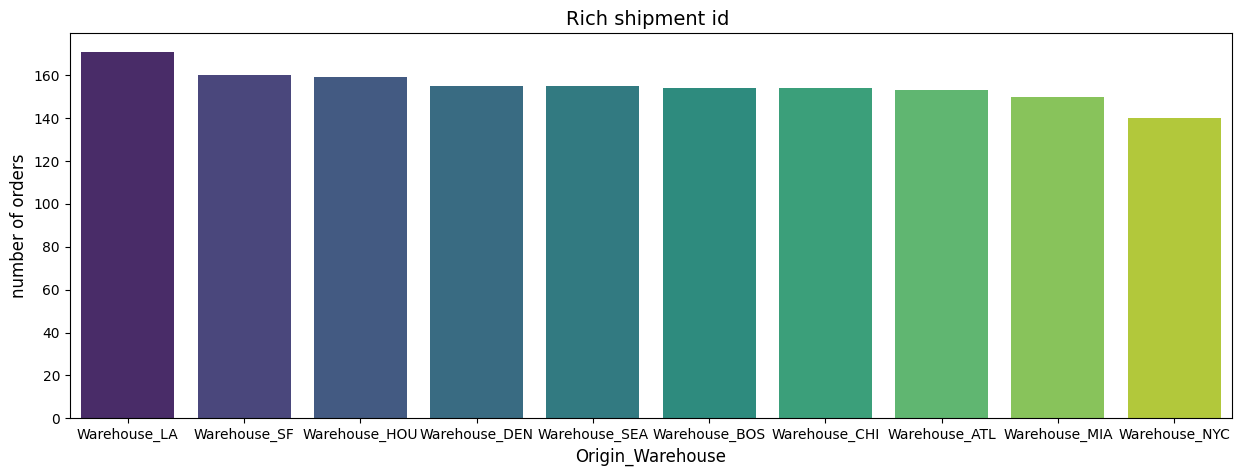

In [80]:
plt.figure(figsize=(15,5))
h=df1.groupby("Origin_Warehouse")['Status'].sum().sort_values(ascending=False).head(10)
h_df=h.reset_index()
sns.barplot(data=h_df,x='Origin_Warehouse',y='Status',palette='viridis')
plt.title("Rich shipment id ",fontsize=14)
plt.xlabel("Origin_Warehouse",fontsize=12)
plt.ylabel("number of orders",fontsize=12)


C:\Users\adilm\AppData\Local\Temp\ipykernel_20424\4131544751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=h_df,x='Destination',y='Status',palette='viridis')


Text(0, 0.5, 'total orders')

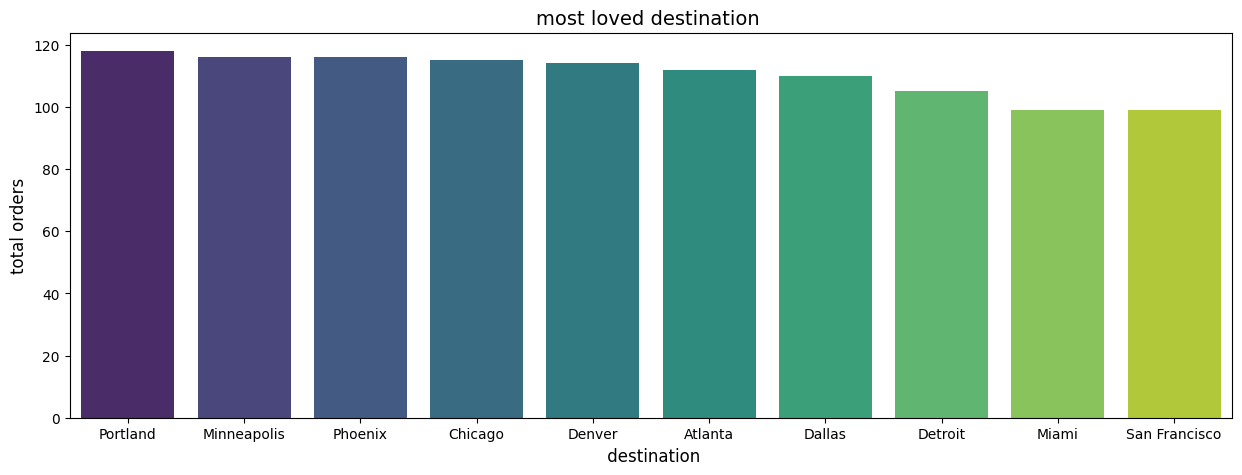

In [81]:
plt.figure(figsize=(15,5))
h=df1.groupby("Destination")['Status'].sum().sort_values(ascending=False).head(10)
h_df=h.reset_index()
sns.barplot(data=h_df,x='Destination',y='Status',palette='viridis')
plt.title("most loved destination ",fontsize=14)
plt.xlabel(" destination",fontsize=12)
plt.ylabel("total orders",fontsize=12)


C:\Users\adilm\AppData\Local\Temp\ipykernel_20424\2440131053.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=h_df,x='Carrier',y='Status',palette='viridis')


Text(0, 0.5, 'total orders')

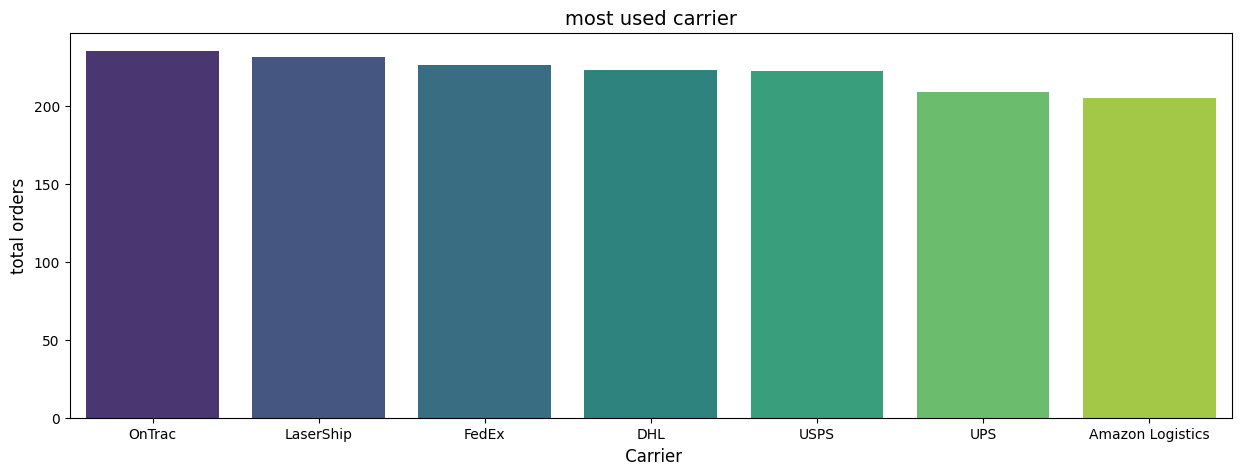

In [82]:
plt.figure(figsize=(15,5))
h=df1.groupby("Carrier")['Status'].sum().sort_values(ascending=False).head(10)
h_df=h.reset_index()
sns.barplot(data=h_df,x='Carrier',y='Status',palette='viridis')
plt.title("most used carrier",fontsize=14)
plt.xlabel(" Carrier",fontsize=12)
plt.ylabel("total orders",fontsize=12)

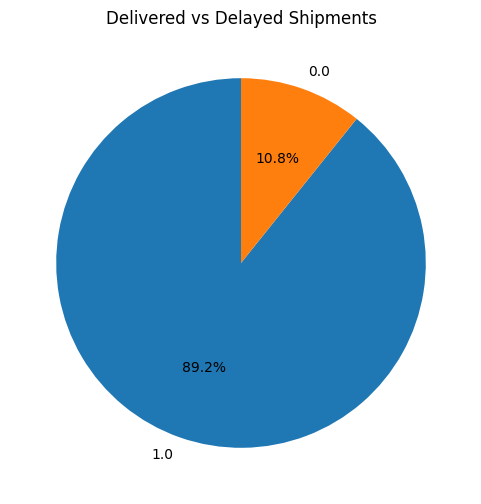

In [83]:
delivery_counts = df1['Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Delivered vs Delayed Shipments')
plt.show()

In [84]:
df1.head(0)

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days,Transit_days


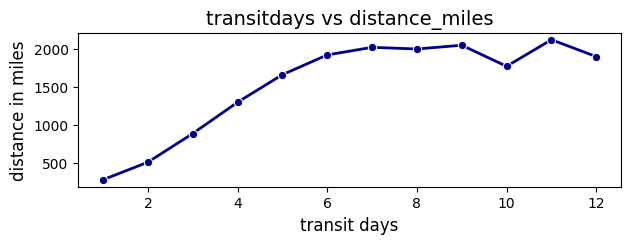

In [85]:
plt.figure(figsize=(7,2))
sns.lineplot(data=df1,x='Transit_Days',y="Distance_miles",color='darkblue', linestyle='-', linewidth=2, marker='o', errorbar=None) 

plt.title("transitdays vs distance_miles",fontsize=14)
plt.xlabel("transit days",fontsize=12)
plt.ylabel("distance in miles",fontsize=12)
plt.show()

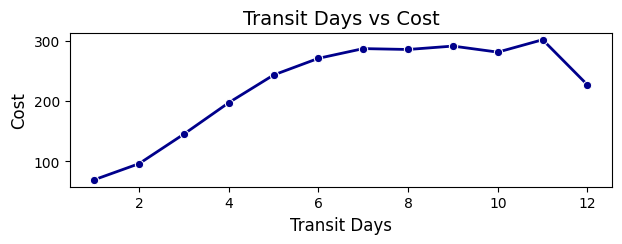

In [86]:
plt.figure(figsize=(7, 2))
sns.lineplot(data=df1, x='Transit_Days', y='Cost',color='darkblue', linestyle='-', linewidth=2, marker='o', errorbar=None)

plt.title("Transit Days vs Cost", fontsize=14)
plt.xlabel("Transit Days", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.show()


In [87]:
df['Shipment_Date']=df['Shipment_Date'].dt.month

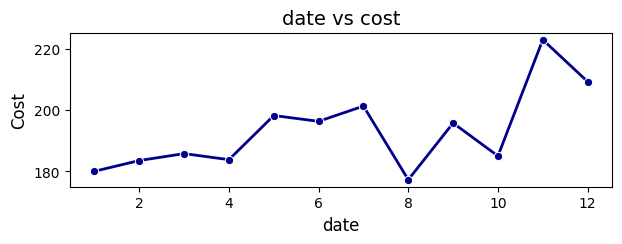

In [88]:
plt.figure(figsize=(7, 2))
sns.lineplot(data=None, x=df['Shipment_Date'], y=df['Cost'],color='darkblue', linestyle='-', linewidth=2, marker='o', errorbar=None)

plt.title("date vs cost", fontsize=14)
plt.xlabel("date", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.show()


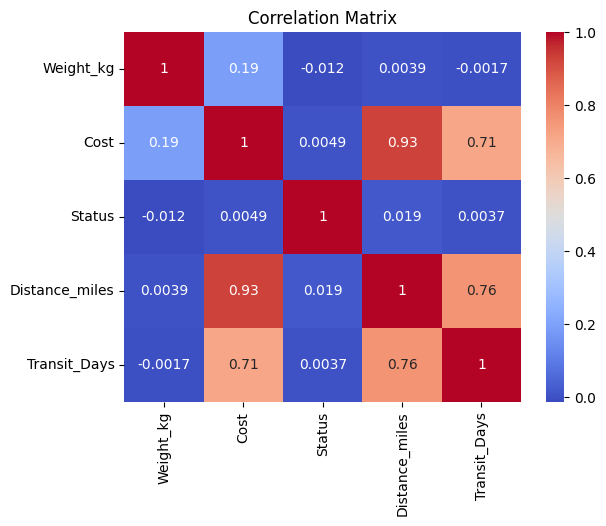

In [115]:
sns.heatmap(df1[['Weight_kg','Cost','Status','Distance_miles','Transit_Days']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [47]:
#now implement  amodel

In [90]:
df['Carrier'].unique()

array(['UPS', 'DHL', 'OnTrac', 'FedEx', 'Amazon Logistics', 'LaserShip',
       'USPS'], dtype=object)

In [91]:
df1.head(0)

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days,Transit_days


In [93]:
df2=df1.drop(columns=['Shipment_ID','Origin_Warehouse','Destination','Shipment_Date','Delivery_Date','Transit_days'])

In [94]:
df2.head(1)

,Carrier,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,UPS,25.7,67.46,1.0,291,2


In [95]:
df2_mew = pd.get_dummies(df2, columns=['Carrier'])

In [96]:
df2_mew.head(0)

,Weight_kg,Cost,Status,Distance_miles,Transit_Days,Carrier_Amazon Logistics,Carrier_DHL,Carrier_FedEx,Carrier_LaserShip,Carrier_OnTrac,Carrier_UPS,Carrier_USPS


In [97]:
carrier_cols = [col for col in df2_mew.columns if col.startswith('Carrier_')]
df2_mew[carrier_cols] = df2_mew[carrier_cols].astype(int)

In [98]:
df2_mew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1884 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Weight_kg                 1884 non-null   float64
 1   Cost                      1884 non-null   float64
 2   Status                    1738 non-null   float64
 3   Distance_miles            1884 non-null   int64  
 4   Transit_Days              1884 non-null   int64  
 5   Carrier_Amazon Logistics  1884 non-null   int32  
 6   Carrier_DHL               1884 non-null   int32  
 7   Carrier_FedEx             1884 non-null   int32  
 8   Carrier_LaserShip         1884 non-null   int32  
 9   Carrier_OnTrac            1884 non-null   int32  
 10  Carrier_UPS               1884 non-null   int32  
 11  Carrier_USPS              1884 non-null   int32  
dtypes: float64(3), int32(7), int64(2)
memory usage: 139.8 KB


In [99]:
df2_mew = df2_mew.dropna(subset=['Status'])

In [100]:

y=df2_mew['Transit_Days']
x=df2_mew.drop('Transit_Days',axis=True)


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
model=LinearRegression()

In [103]:
df2_mew.isna().sum()

Weight_kg                   0
Cost                        0
Status                      0
Distance_miles              0
Transit_Days                0
Carrier_Amazon Logistics    0
Carrier_DHL                 0
Carrier_FedEx               0
Carrier_LaserShip           0
Carrier_OnTrac              0
Carrier_UPS                 0
Carrier_USPS                0
dtype: int64

In [104]:
#df2_mew = df2_mew.dropna(subset=['Status'])

In [105]:
model.fit(x_train,y_train)

LinearRegression()

In [106]:
prediction=model.predict(x_test)

In [107]:
rmse=np.sqrt(mean_squared_error(y_test,prediction))
print(f"rmse is is {rmse}")
mse=mean_squared_error(y_test,prediction)
print(f"mse is {mse}")
r2=r2_score(y_test,prediction)
print(f"the r 2 valuje is {r2}")

rmse is is 1.2058782054538868
mse is 1.4541422463886864
the r 2 valuje is 0.538702983309569


In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
mode=RandomForestRegressor(n_estimators=100,random_state=42)

In [111]:
mode.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [112]:
predeict=model.predict(x_test)

In [114]:
rmse=np.sqrt(mean_squared_error(y_test,predeict))
print(f"rmse is is {rmse}")
mse=mean_squared_error(y_test,predeict)
print(f"mse is {mse}")
r2=r2_score(y_test,predeict)
print(f"the r 2 valuje is {r2}")

rmse is is 1.2058782054538868
mse is 1.4541422463886864
the r 2 valuje is 0.538702983309569
